                                                            TASK-05
Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day, and then visualize accident hotspots and contributing factors.                               

Step 1: Import libraries and load data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [29]:
df = pd.read_csv('/content/drive/MyDrive/acc_20.csv')

In [30]:
print(df.head())

        CASENUM  STRATUM                              STRATUMNAME  REGION  \
0  202002121240        9  Stratum 9 - LMY PV No Injuries in Crash       4   
1  202002121829        8         Stratum 8 - NLMY PV Minor Injury       3   
2  202002121849        9  Stratum 9 - LMY PV No Injuries in Crash       3   
3  202002123484       10                       Stratum 10 - Other       4   
4  202002123576       10                       Stratum 10 - Other       1   

                                          REGIONNAME  PSU    PJ  PSU_VAR  \
0  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140       20   
1  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   28  4139       28   
2  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142       12   
3  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140       20   
4     Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT)   22  4149       22   

   URBANICITY URBANICITYNAME  ...  WEATHR_IM  WEATHR_IMNAME  MAXSEV_IM  \
0     

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54745 entries, 0 to 54744
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CASENUM         54745 non-null  int64  
 1   STRATUM         54745 non-null  int64  
 2   STRATUMNAME     54745 non-null  object 
 3   REGION          54745 non-null  int64  
 4   REGIONNAME      54745 non-null  object 
 5   PSU             54745 non-null  int64  
 6   PJ              54745 non-null  int64  
 7   PSU_VAR         54745 non-null  int64  
 8   URBANICITY      54745 non-null  int64  
 9   URBANICITYNAME  54745 non-null  object 
 10  VE_TOTAL        54745 non-null  int64  
 11  VE_FORMS        54745 non-null  int64  
 12  PVH_INVL        54745 non-null  int64  
 13  PEDS            54745 non-null  int64  
 14  PERMVIT         54745 non-null  int64  
 15  PERNOTMVIT      54745 non-null  int64  
 16  NUM_INJ         54745 non-null  int64  
 17  NUM_INJNAME     54745 non-null 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [32]:
df.columns

Index(['CASENUM', 'STRATUM', 'STRATUMNAME', 'REGION', 'REGIONNAME', 'PSU',
       'PJ', 'PSU_VAR', 'URBANICITY', 'URBANICITYNAME', 'VE_TOTAL', 'VE_FORMS',
       'PVH_INVL', 'PEDS', 'PERMVIT', 'PERNOTMVIT', 'NUM_INJ', 'NUM_INJNAME',
       'MONTH', 'MONTHNAME', 'YEAR', 'YEARNAME', 'DAY_WEEK', 'DAY_WEEKNAME',
       'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'HARM_EV', 'HARM_EVNAME',
       'ALCOHOL', 'ALCOHOLNAME', 'MAX_SEV', 'MAX_SEVNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2', 'RELJCT2NAME',
       'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_ROAD',
       'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'SCH_BUS', 'SCH_BUSNAME',
       'INT_HWY', 'INT_HWYNAME', 'WEATHER', 'WEATHERNAME', 'WKDY_IM',
       'WKDY_IMNAME', 'HOUR_IM', 'HOUR_IMNAME', 'MINUTE_IM', 'MINUTE_IMNAME',
       'EVENT1_IM', 'EVENT1_IMNAME', 'MANCOL_IM', 'MANCOL_IMNAME',
       'RELJCT1_IM', 'RELJCT1_IMNAME', 'RELJCT2_IM', 'RELJCT2_IMNAME',
       'LGTCON_IM', 'LGTCON_IMN

 Step 2: Data Preprocessing and Feature Engineering



In [33]:
df['HOUR'] = pd.to_numeric(df['HOUR'], errors='coerce')
df['MONTH'] = pd.to_numeric(df['MONTH'], errors='coerce')
df['DAY_WEEK'] = pd.to_numeric(df['DAY_WEEK'], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MAX_SEV'] = pd.to_numeric(df['MAX_SEV'], errors='coerce')
df['NUM_INJ'] = pd.to_numeric(df['NUM_INJ'], errors='coerce') # Number of injuries
# Handle potential NaN values by dropping them for analysis or filling appropriately
df.dropna(subset=['HOUR', 'MONTH', 'DAY_WEEK', 'YEAR', 'MAX_SEV'], inplace=True)



In [34]:
print("\nProcessed relevant columns to numeric types.")
print(df[['YEAR', 'MONTH', 'DAY_WEEK', 'HOUR', 'MAX_SEV', 'NUM_INJ']].head())



Processed relevant columns to numeric types.
   YEAR  MONTH  DAY_WEEK  HOUR  MAX_SEV  NUM_INJ
0  2020      1         4     8        0        0
1  2020      1         4     1        2        1
2  2020      1         4    13        0        0
3  2020      1         4    14        0        0
4  2020      1         4    17        0        0


 Step 3: Analyze Patterns Related to Time of Day



/tmp/ipython-input-35-713550546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HOUR', data=df, palette='viridis')


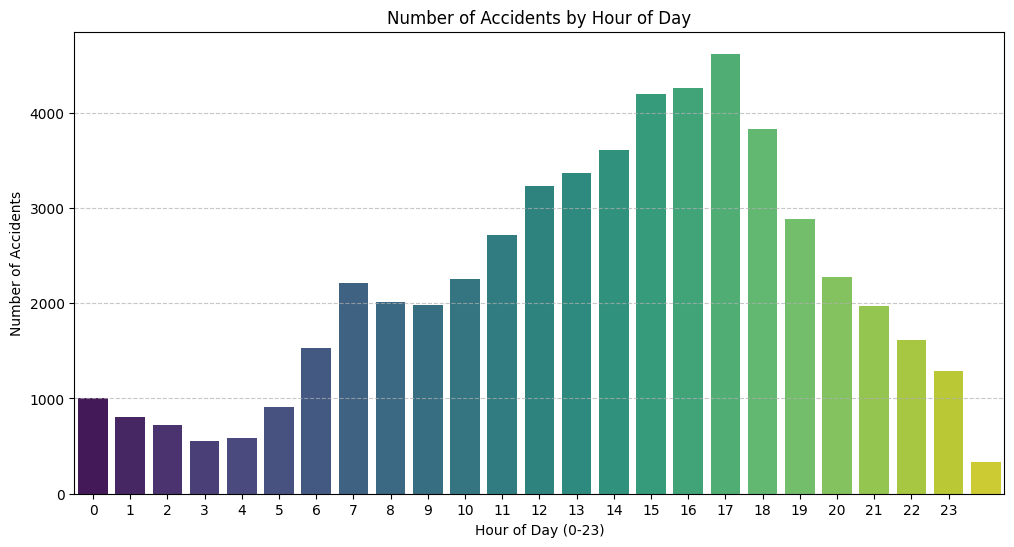

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='HOUR', data=df, palette='viridis')
plt.title('Number of Accidents by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Accidents')
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-36-3502732462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DAY_WEEKNAME', data=df, palette='plasma', order=df['DAY_WEEKNAME'].value_counts().index)


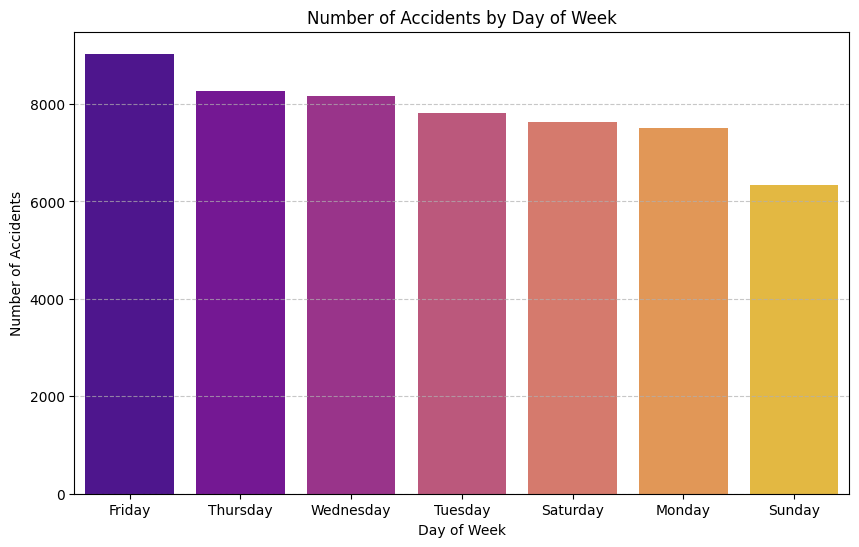

In [36]:
# Accidents by Day of Week

plt.figure(figsize=(10, 6))
sns.countplot(x='DAY_WEEKNAME', data=df, palette='plasma', order=df['DAY_WEEKNAME'].value_counts().index)
plt.title('Number of Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-37-1187839092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MONTHNAME', data=df, palette='cividis', order=df['MONTHNAME'].value_counts().index)


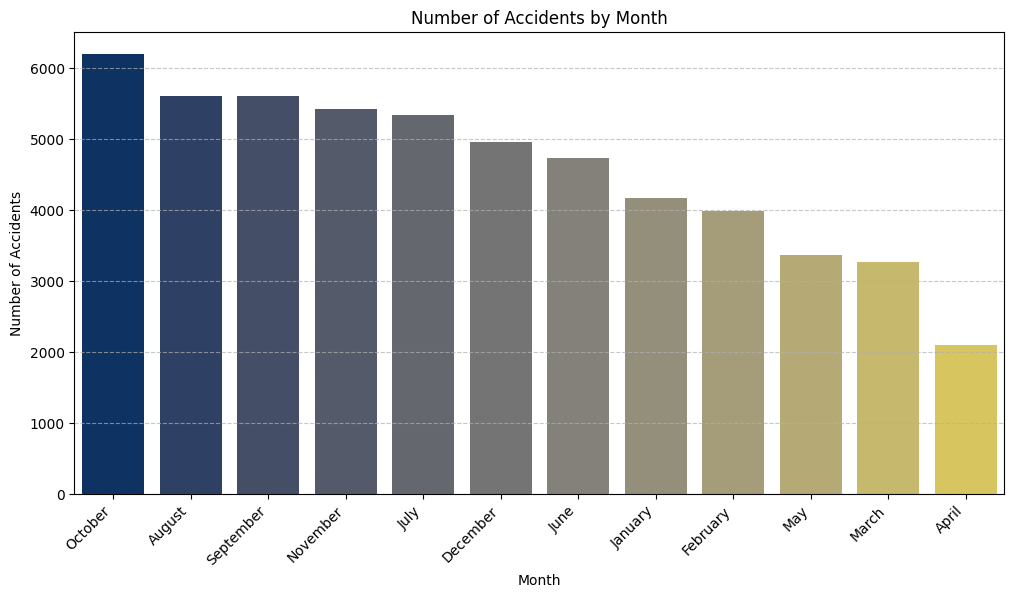

In [37]:
# Accidents by Month
plt.figure(figsize=(12, 6))
sns.countplot(x='MONTHNAME', data=df, palette='cividis', order=df['MONTHNAME'].value_counts().index)
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-38-1878787468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='YEAR', data=df, palette='GnBu')


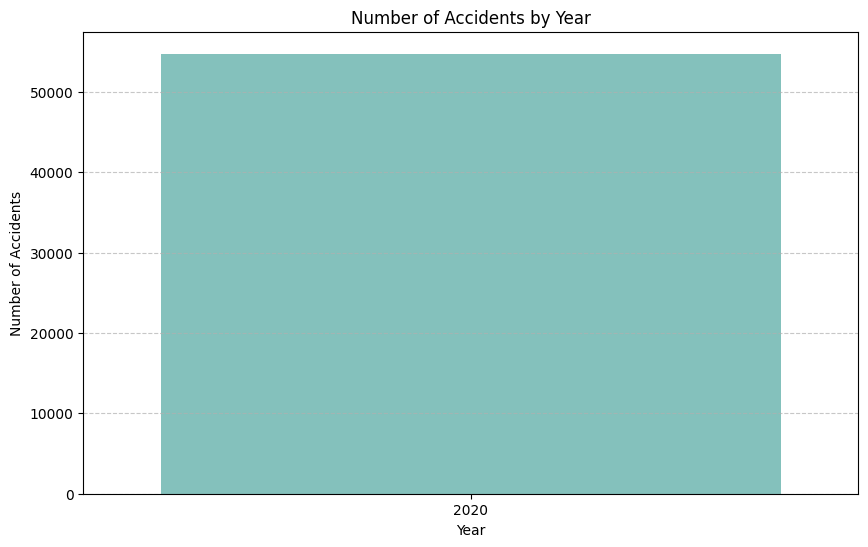

In [38]:
# Accidents by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='YEAR', data=df, palette='GnBu')
plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Step 4: Analyze Patterns Related to Weather Conditions

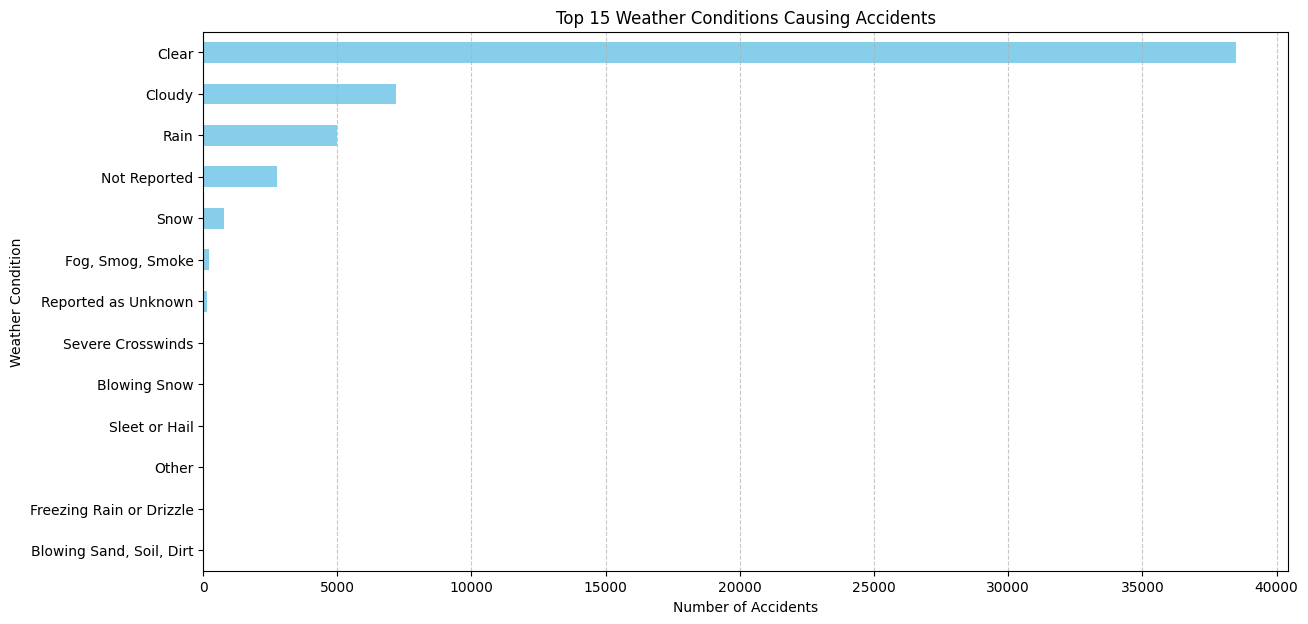

In [39]:
# Top Weather Conditions causing accidents
plt.figure(figsize=(14, 7))
df['WEATHERNAME'].value_counts().nlargest(15).plot(kind='barh', color='skyblue')
plt.title('Top 15 Weather Conditions Causing Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-40-1576374695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LGT_CONDNAME', data=df, palette='Pastel2', order=df['LGT_CONDNAME'].value_counts().index)


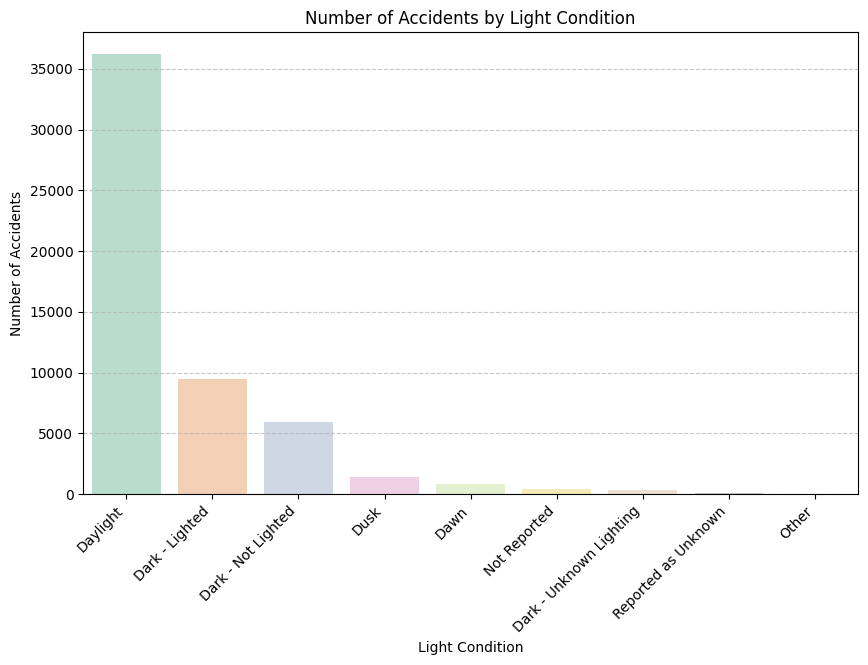

In [40]:
# Accidents by Light Condition
plt.figure(figsize=(10, 6))
sns.countplot(x='LGT_CONDNAME', data=df, palette='Pastel2', order=df['LGT_CONDNAME'].value_counts().index)
plt.title('Number of Accidents by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Step 5: Analyze Patterns Related to Road Conditions / Environmental Factors


--- Analyzing Patterns Related to Road Conditions / Environmental Factors ---


/tmp/ipython-input-41-530501216.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2', order=df[feature].value_counts().index)
/tmp/ipython-input-41-530501216.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2', order=df[feature].value_counts().index)
/tmp/ipython-input-41-530501216.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2', order=df[feature].value_counts().index)
/tmp/ipython-input-41-530501216.py:8: FutureWarning: 

Passin

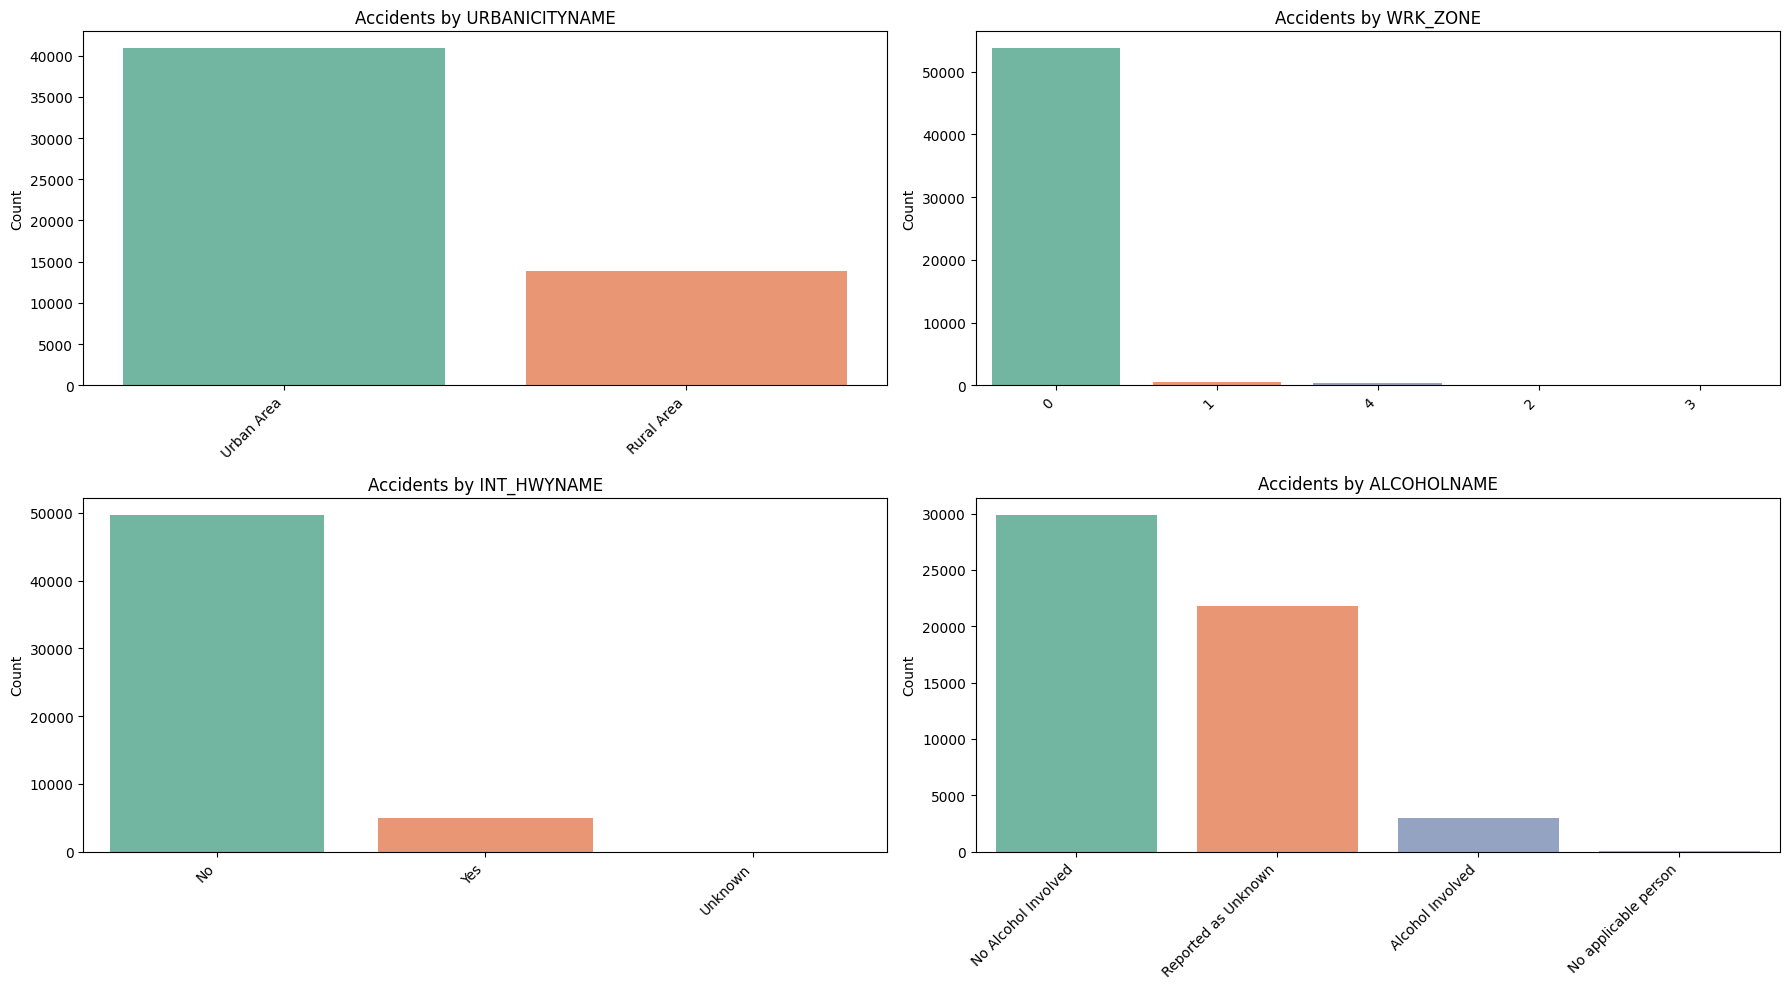

In [41]:
print("\n--- Analyzing Patterns Related to Road Conditions / Environmental Factors ---")

env_features = ['URBANICITYNAME', 'WRK_ZONE', 'INT_HWYNAME', 'ALCOHOLNAME'] # ALCOHOLNAME for alcohol involvement

plt.figure(figsize=(18, 10))
for i, feature in enumerate(env_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=feature, data=df, palette='Set2', order=df[feature].value_counts().index)
    plt.title(f'Accidents by {feature}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Step 6: Identify Accident Hotspots (ADAPTED - No Lat/Lon)

In [42]:
print("\n--- Adapting Accident Hotspot Analysis (No Latitude/Longitude Data) ---")
print("The dataset does not contain 'Start_Lat' or 'Start_Lng' columns, so a geographical heatmap is not possible.")
print("Instead, we will identify hotspots by 'REGIONNAME' and 'CITY'.")


--- Adapting Accident Hotspot Analysis (No Latitude/Longitude Data) ---
The dataset does not contain 'Start_Lat' or 'Start_Lng' columns, so a geographical heatmap is not possible.
Instead, we will identify hotspots by 'REGIONNAME' and 'CITY'.


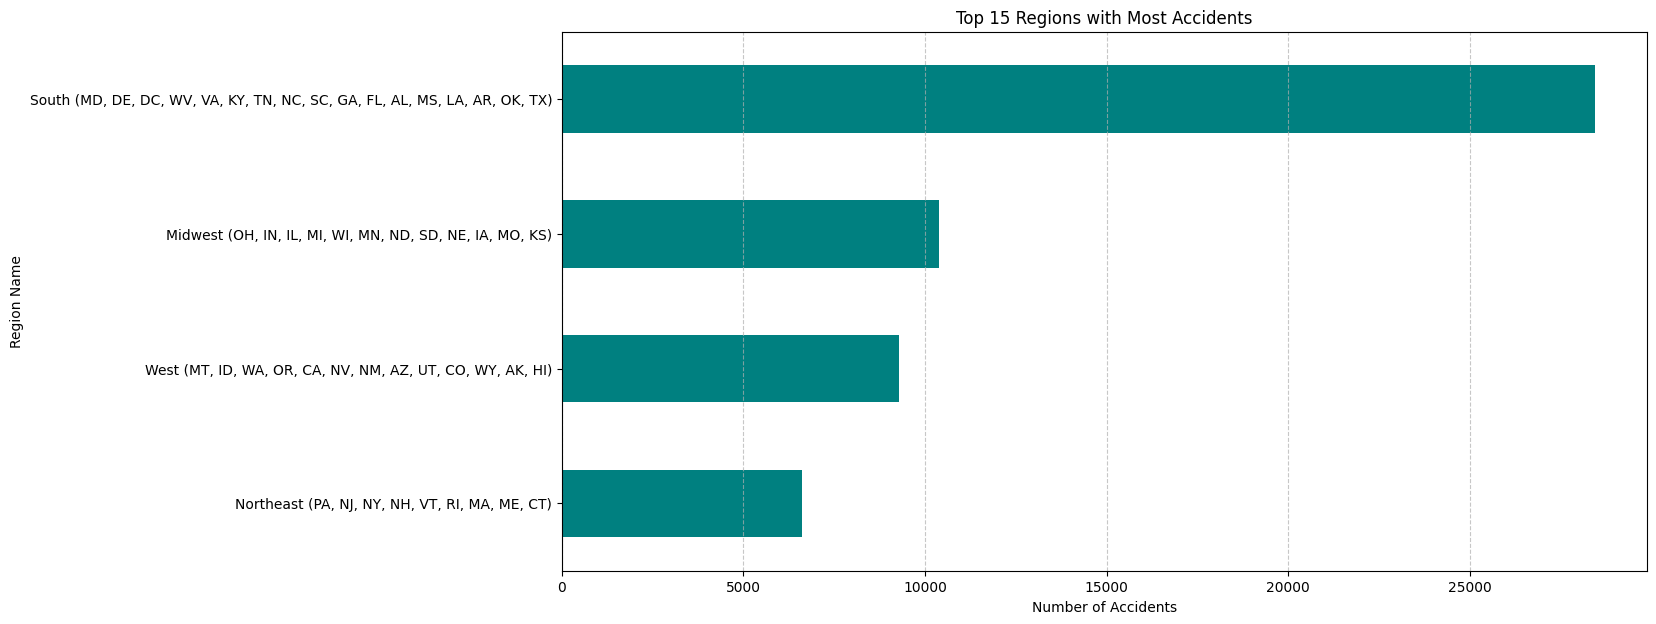

In [43]:
# Accidents by Region
plt.figure(figsize=(14, 7))
df['REGIONNAME'].value_counts().nlargest(15).plot(kind='barh', color='teal')
plt.title('Top 15 Regions with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Region Name')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Step 7: Visualize Contributing Factors (Severity and Injuries)

In [18]:
print("\n--- Further Visualization of Contributing Factors (Severity and Injuries) ---")



--- Further Visualization of Contributing Factors (Severity and Injuries) ---


/tmp/ipython-input-19-542591992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MAX_SEVNAME', data=df, palette='magma', order=df['MAX_SEVNAME'].value_counts().index)


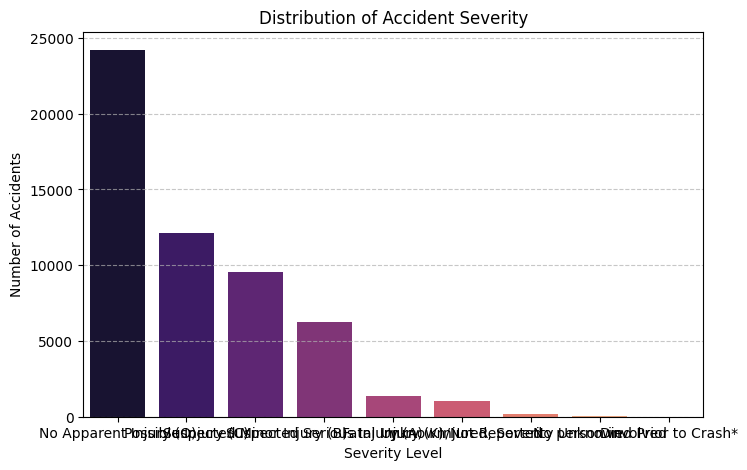

In [19]:
# Distribution of Severity
plt.figure(figsize=(8, 5))
sns.countplot(x='MAX_SEVNAME', data=df, palette='magma', order=df['MAX_SEVNAME'].value_counts().index)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-20-1848025460.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HOUR', y='MAX_SEV', data=df, palette='viridis')


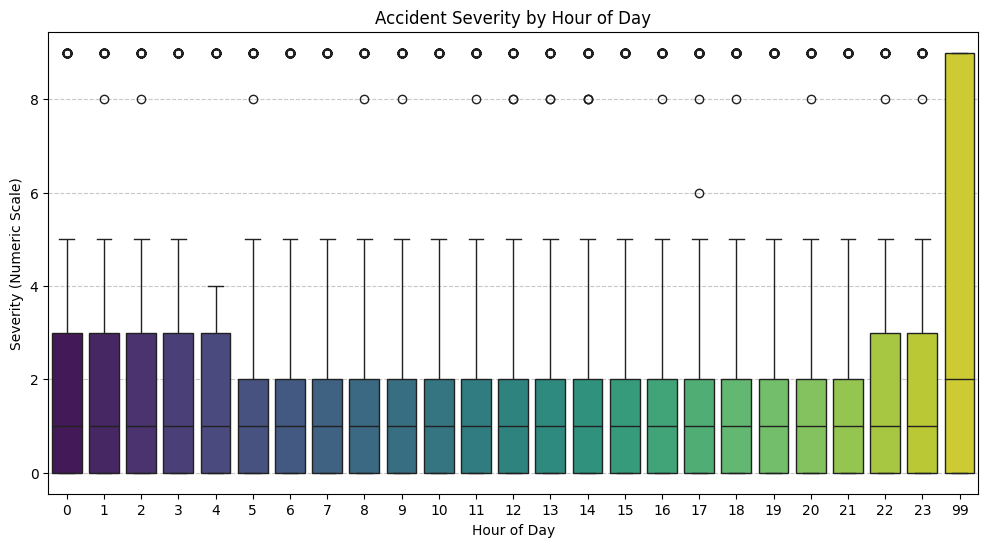

In [20]:
# Severity by Hour of Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='HOUR', y='MAX_SEV', data=df, palette='viridis')
plt.title('Accident Severity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Severity (Numeric Scale)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

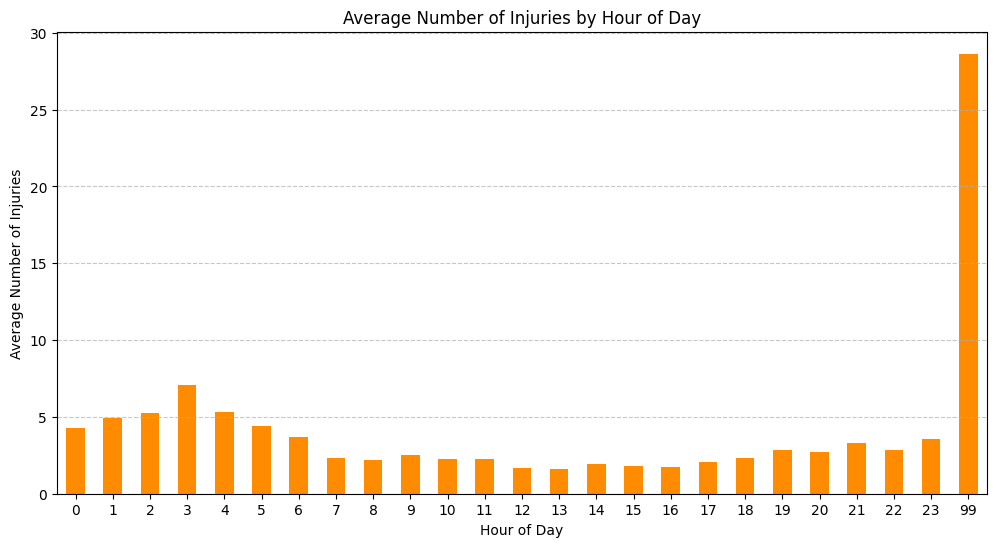

In [21]:
# Average Number of Injuries by Hour of Day
plt.figure(figsize=(12, 6))
df.groupby('HOUR')['NUM_INJ'].mean().plot(kind='bar', color='darkorange')
plt.title('Average Number of Injuries by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Injuries')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [49]:
# Severity by Weather Condition (Top 10 weather conditions)
top_weather_conditions = df['WEATHERNAME'].value_counts().nlargest(10).index
df_filtered_weather = df[df['WEATHERNAME'].isin(top_weather_conditions)]


/tmp/ipython-input-23-1025124524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WEATHERNAME', y='MAX_SEV', data=df_filtered_weather, palette='RdYlBu')


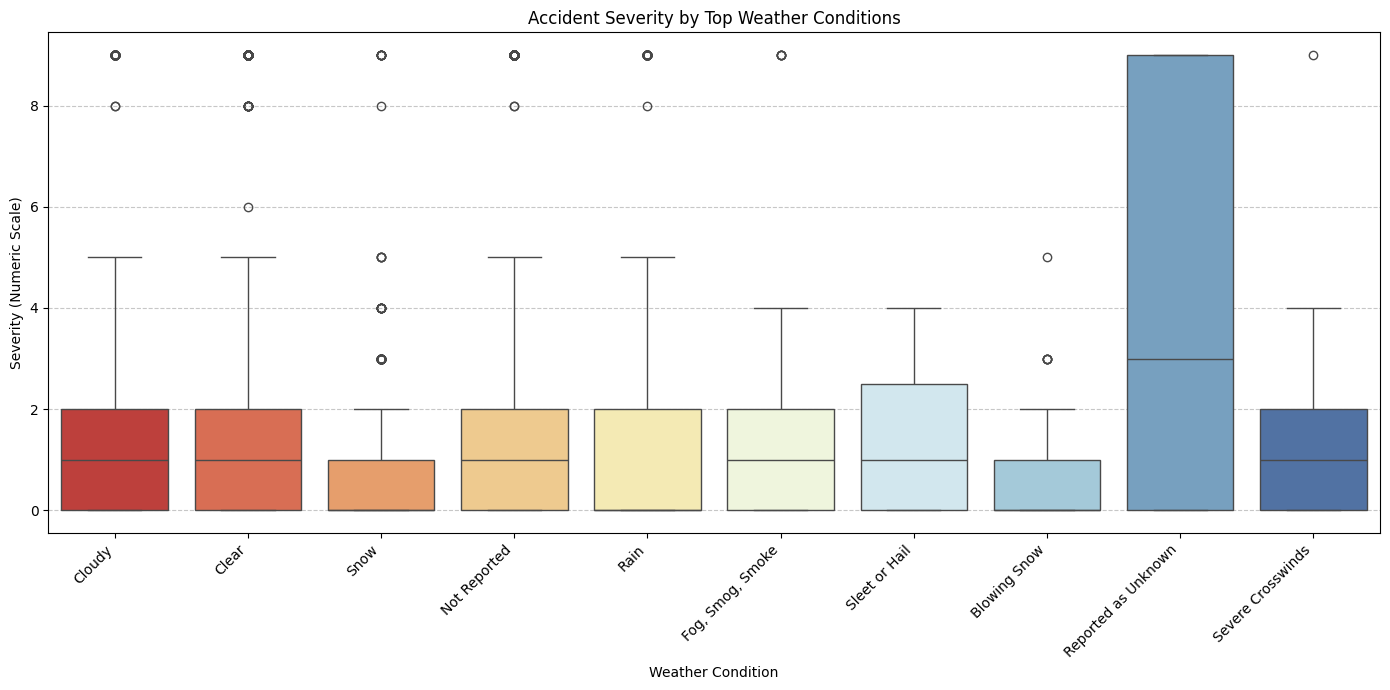

In [23]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='WEATHERNAME', y='MAX_SEV', data=df_filtered_weather, palette='RdYlBu')
plt.title('Accident Severity by Top Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Severity (Numeric Scale)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
print("\nAnalysis complete. Check the generated plots. Note: Geographical map is not possible with current columns.")



Analysis complete. Check the generated plots. Note: Geographical map is not possible with current columns.
